# ***Parallel merge sort***

In [ ]:
# Python Program to implement merge sort using multi-processing
import time
import random
import multiprocessing as mp
from multiprocessing import Pool

# number of elements in array
MAX = 0

# number of processs
PROCESS_MAX = 4

# sort array using merge sort
def merge_sort(array):
  '''
  args: an unsorted array
  return: a sorted array
  sequential merge sort
  '''

  if len(array) <= 1:
    result = array
    return result

  # Divide the array into two halves.
  mid = len(array) // 2
  left = array[:mid]
  right = array[mid:]

  # Merge sort two halves.
  results = [merge_sort(left), merge_sort(right)]

  # Merge two halves
  return merge(results[0], results[1])

# merge two array
def merge(left, right):
  '''
  merge 2 sorted array
  '''
  result = []
  i = 0
  j = 0
  while i < len(left) and j < len(right):
    # Add the minimum number of left[i] and right[i] to result
    if left[i] < right[j]:
      result.append(left[i])
      i += 1
    else:
      result.append(right[j])
      j += 1

  # Add any remaining elements from the left list to the result.
  while i < len(left):
    result.append(left[i])
    i += 1

  # Add any remaining elements from the right list to the result.
  while j < len(right):
    result.append(right[j])
    j += 1

  return result

# merge sort using multi-processing
def merge_sort_multiProcess(array):
  '''
  args: an unsorted array
  return: a sorted array

  divide the array into parts
  sort each of these parts simultaneously
  merge pair of the parts simultaneously
  '''

  part = 0
  arr = list()

  # divide array into PROCESS_MAX part
  for i in range(PROCESS_MAX):
    arr.append(array[((part*MAX)//PROCESS_MAX) :((part+1)*(MAX))//PROCESS_MAX])
    part+=1

  # sort each part of the array parallel using multi-processing
  result = Pool(mp.cpu_count()).map(merge_sort, arr)

  # merge each part of the array
  while len(result) > 1:
    # if the number of the parts is odd, then merge 2 last parts first
    if len(result) % 2 != 0:
      result[-2] = merge(result[-2],result[-1])
      result.pop()

    # put parts in to pairs and merge
    ret = [(result[i*2], result[i*2+1]) for i in range(int(len(result) / 2))]
    # merge
    result = Pool(mp.cpu_count()).starmap(merge, ret)

  return result[0]

# ***Evaluation***

In [ ]:
# size of array in each loop
number = [10 ** i for i in range(2, 8)]
number_ite = [i for i in range(2, 8)]

#list store measured execution time
runningTimeMulti = []
runningTimeNotMulti = []
random.seed(1)

for num in number:
  array = [0] * num
  MAX = num
  for i in range(num):
    array[i] = random.randint(0, 1000000)

  # merge sort using multi-processing
  # mark the time and execute merge_sort_multiProcess
  totaltime = [0,0]
  result = []
  t1 = time.perf_counter()
  result = merge_sort_multiProcess(array)
  t2 = time.perf_counter()
  totaltime[0] = t2-t1
  runningTimeMulti.append(t2-t1)

  # merge sort
  # mark the time and execute sequential merge sort
  result = []
  t1 = time.perf_counter()
  merge_sort(array)
  t2 = time.perf_counter()
  totaltime[1] = t2-t1
  runningTimeNotMulti.append(t2-t1)

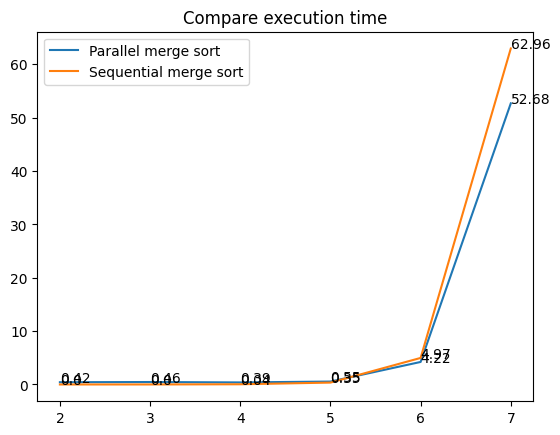

In [ ]:
import matplotlib.pyplot as plt
# plot the measured execution time
plt.plot(number_ite,runningTimeMulti, label = 'Parallel merge sort')
plt.plot(number_ite,runningTimeNotMulti, label = 'Sequential merge sort')
for a, b in zip(number_ite,runningTimeMulti):
  plt.text(a, b, str(round(b,2)))
for a, b in zip(number_ite,runningTimeNotMulti):
  plt.text(a, b, str(round(b,2)))

plt.title('Compare execution time')
plt.legend()
plt.show()